In [ ]:
import tensorflow as tf
print(tf.__version__)

2.9.2


In [ ]:
from sklearn.datasets import load_breast_cancer
data=load_breast_cancer()
type(data) # -> sklearn.utils.Bunch is a dictionary basically

sklearn.utils.Bunch

In [ ]:
data.keys()
#dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
data.data.shape
#has 569 samples and 30 feature (569 x 30)

(569, 30)

In [ ]:
 #sono 569 "pazienti" i cui nei sono classificati secondo 30 diverse caratteristiche
 #data.feature_name ritorna tali caratteristiche
 
 #abbiamo anche i targhet, i risultati 1=maligno 0=beningo

 #data.target
 #data.target_name
 #data.targhet_shape (sono solo le risposte, 569)

In [ ]:
from sklearn.model_selection import train_test_split

#split the data into train and test sets
x=0
y=1
train=[0,0]
test=[0,0]
train[x], test[x], train[y], test[y] = train_test_split(data.data, data.target, test_size=0.33)
print(train[x].shape)
print(test[x].shape)
N, D = train[x].shape

(381, 30)
(188, 30)


In [ ]:
#Adesso riscaliamo tutti i valri perchè altrimenti variano in range troppo grosso e non uniformi
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train[x] = scaler.fit_transform(train[x])
test[x] = scaler.transform(test[x])


In [ ]:
#Build the model

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1,input_shape=(D,), activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

#train 

r=model.fit(train[x], train[y], validation_data=(test[x],test[y]), epochs=500)

#l'oggetto ritornato contiene informazioni sul training process

print("Train score:", model.evaluate(train[x],train[y]))
print("Test score:", model.evaluate(test[x],test[y]))


Epoch 1/500
12/12 [==============================] - 1s 24ms/step - loss: 0.6956 - accuracy: 0.5722 - val_loss: 0.6570 - val_accuracy: 0.6596
Epoch 2/500
12/12 [==============================] - 0s 6ms/step - loss: 0.6268 - accuracy: 0.6325 - val_loss: 0.5856 - val_accuracy: 0.7394
Epoch 3/500
12/12 [==============================] - 0s 5ms/step - loss: 0.5695 - accuracy: 0.6982 - val_loss: 0.5254 - val_accuracy: 0.8085
Epoch 4/500
12/12 [==============================] - 0s 6ms/step - loss: 0.5222 - accuracy: 0.7480 - val_loss: 0.4761 - val_accuracy: 0.8351
Epoch 5/500
12/12 [==============================] - 0s 4ms/step - loss: 0.4801 - accuracy: 0.7953 - val_loss: 0.4375 - val_accuracy: 0.8670
Epoch 6/500
12/12 [==============================] - 0s 5ms/step - loss: 0.4459 - accuracy: 0.8320 - val_loss: 0.4060 - val_accuracy: 0.8883
Epoch 7/500
12/12 [==============================] - 0s 5ms/step - loss: 0.4167 - accuracy: 0.8556 - val_loss: 0.3799 - val_accuracy: 0.8989
Epoch 8/500


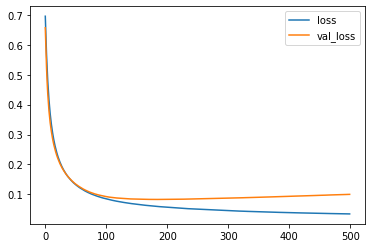

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss') #training loss
plt.plot(r.history['val_loss'], label='val_loss') #validation loss
plt.legend()

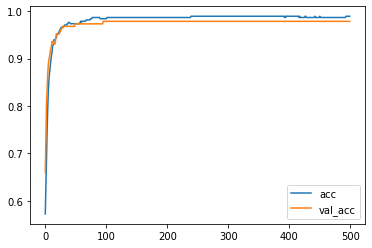

In [ ]:
plt.plot(r.history['accuracy'], label='acc') #training loss
plt.plot(r.history['val_accuracy'], label='val_acc') #validation loss
plt.legend()

In [ ]:
# Part 2: Making Predictions

P = model.predict(test[x])
print(P) # they are outputs of the sigmoid, interpreted as probabilities p(y = 1 | x)


6/6 [==============================] - 0s 3ms/step
[[9.99998093e-01]
 [9.99957502e-01]
 [8.14450502e-01]
 [9.98996675e-01]
 [5.25701435e-05]
 [6.95884106e-13]
 [9.99971747e-01]
 [9.99999881e-01]
 [4.77021700e-03]
 [9.99993145e-01]
 [9.89623547e-01]
 [2.41026137e-04]
 [1.91157824e-07]
 [1.00000000e+00]
 [9.99995708e-01]
 [9.99787688e-01]
 [9.04050231e-01]
 [9.99904454e-01]
 [6.40680417e-02]
 [9.93324935e-01]
 [9.99973118e-01]
 [9.54219401e-01]
 [9.99973834e-01]
 [9.99980807e-01]
 [9.99701321e-01]
 [9.98029947e-01]
 [4.19625867e-04]
 [7.23790348e-01]
 [9.99948144e-01]
 [9.99757588e-01]
 [9.99961615e-01]
 [9.99146700e-01]
 [3.16714728e-03]
 [9.99927104e-01]
 [3.73032417e-05]
 [9.99952495e-01]
 [9.99926031e-01]
 [9.99984622e-01]
 [9.99993682e-01]
 [8.93471846e-16]
 [9.99183238e-01]
 [9.99997795e-01]
 [9.99857783e-01]
 [9.97683823e-01]
 [9.99993920e-01]
 [9.97595370e-01]
 [1.79590641e-12]
 [9.99992430e-01]
 [9.97429848e-01]
 [2.62489630e-09]
 [2.61792284e-03]
 [2.11255960e-04]
 [7.28691788e

In [ ]:
# Round to get the actual predictions
# Note: has to be flattened since the targets are size (N,) while the predictions are size (N,1)

#in pratica ti ritorna una colonna di N elementi noi vogliamo un vettor riga di N elem
import numpy as np
P = np.round(P).flatten()
print(P)

[1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1.
 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1.
 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1.
 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1.
 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1.]


In [ ]:
# Calculate the accuracy, compare it to evaluate() output

# SOLO CON INTERI: con == si fa una element wise comparazione nel numpy array e se la comparazione è vera il valore è sostituito con 1, se no con 0
print("Manually calculated accuracy:", np.mean(P == test[y]))
#Alla fine è la stessa cosa
print("Evaluate output:", model.evaluate(test[x], test[y]))

Manually calculated accuracy: 0.9787234042553191
6/6 [==============================] - 0s 3ms/step - loss: 0.1000 - accuracy: 0.9787
Evaluate output: [0.09996064007282257, 0.978723406791687]


In [ ]:
#Part 3: Saving and Loading a Model

# Let's now save our model to a file
model.save('linearclassifier.h5')

# Check that the model file exists
!ls -lh 




# Let's load the model and confirm that it still works
# Note: there is a bug in Keras where load/save only works if you DON'T use the Input() layer explicitly
# So, make sure you define the model with ONLY Dense(1, input_shape=(D,))
# At least, until the bug is fixed
# https://github.com/keras-team/keras/issues/10417
model = tf.keras.models.load_model('linearclassifier.h5')
print(model.layers)
model.evaluate(test[x], test[y])


# Download the file - requires Chrome (at this point)
from google.colab import files
files.download('linearclassifier.h5')

total 24K
-rw-r--r-- 1 root root  19K Jan 26 16:56 linearclassifier.h5
drwxr-xr-x 1 root root 4.0K Jan 24 14:38 sample_data
6/6 [==============================] - 0s 4ms/step - loss: 0.1000 - accuracy: 0.9787


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>